#GE 127 Laboratory Exercise 7: 3D Conformal Coordinate Transformation Adjustment
Submitted by : <Name>

In [ ]:
#Imports

import pandas as pd
import numpy as np
import math as m

##Exercise: 3D Conformal Coordinate Transformation

`1. Describe the problem. What is the condition equation for this type of problem? Insert sample photos if necessary`

3D Conformal Transformation Adjustment - Given set of points with coordinates from two coordinate systems, solve for the 3D Conformal transformation parameters
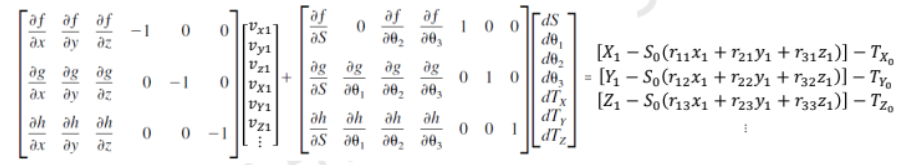

`2. Describe the given. What are the values for?`


Three points are given which have known coordinate values for two coordinate systems namely Stereo and Ground Coordinate systems. The columns **stereo_x**, **stereo_y**, and **stereo_z** corresponds to the x, y, and z coordinates of each point in stereo coordinate system respectively. The columns **ground_x**, **ground_y**, and **ground_z** corresponds to the x, y, and z coordinates of each point in ground coordinate system respectively. The stereo_sigma and ground_sigma variables contain the standard deviation values for the stereo and ground coordinate values respectively. From these coordinates, the values of the parameters are estimated

In [ ]:
#Given

points = [1,2,3]
stereo_x = [0.55,12.69,7.58]
stereo_y = [3.89,10.66,13.01]
stereo_z = [22.36,79.23,12.33]
stereo_sigma = 0.0005
ground_x = [1689.20,7373.34,1269.75]
ground_y = [1318.94,3859.77,3553.18]
ground_z = [5227.79,15144.00,3188.16]
ground_sigma = 0.5

given = pd.DataFrame({'Point':points, 'stereo_x': stereo_x, 'stereo_y': stereo_y, 'stereo_z': stereo_z, 'ground_x': ground_x, 'ground_y' : ground_y, 'ground_z' : ground_z}).set_index('Point')
print(given)

       stereo_x  stereo_y  stereo_z  ground_x  ground_y  ground_z
Point                                                            
1          0.55      3.89     22.36   1689.20   1318.94   5227.79
2         12.69     10.66     79.23   7373.34   3859.77  15144.00
3          7.58     13.01     12.33   1269.75   3553.18   3188.16


In [ ]:
#Given

points = [1,2,3]
stereo_x = [1000,1620,1100]
stereo_y = [1000,740,1200]
stereo_z = [1000,340,1300]
stereo_sigma = 0.005
ground_x = [1911.9,2540.6,1547.5]
ground_y = [1435.2,1668.1,1396.7]
ground_z = [554.1,1216.1,629.8]
ground_sigma = 0.005

given = pd.DataFrame({'Point':points, 'stereo_x': stereo_x, 'stereo_y': stereo_y, 'stereo_z': stereo_z, 'ground_x': ground_x, 'ground_y' : ground_y, 'ground_z' : ground_z}).set_index('Point')
print(given)

       stereo_x  stereo_y  stereo_z  ground_x  ground_y  ground_z
Point                                                            
1          1000      1000      1000    1911.9    1435.2     554.1
2          1620       740       340    2540.6    1668.1    1216.1
3          1100      1200      1300    1547.5    1396.7     629.8


`3. What are the elements of the problem? (observations and parameters)`

Observation Variables - Coordinates in stereo and ground coordinate systems (stereo_x, stereo_y, stereo_z, ground_x, ground_y, ground_z) <br/>
Parameter Variables - s (scale), rx (rotation angle in x), ry (rotation angle in y), rz (rotation angle in z), Tx (translation in X), Ty (translation in Y), and Tz (translation in Z).

`4. Determine if the measurements are correlated or uncorrelated`

The measurements are assumed to be uncorrelated since no covariance values are given

For this problem, we have set the initial estimates for this problem, as assigned below

In [ ]:
#Solving for parameters
s = 150
rx = m.radians(0) #radians
ry = m.radians(20) #radians
rz = m.radians(20) #radians
Tx = 200 #meters
Ty = 400 #meters
Tz = 900 #meters

`5. Create a function, **matR**, which accepts three arguments: rx, ry, and rz, the rotation angles (in radians) in x, y, and z axes respectively. The function returns the populated rotation matrix R.`

In [ ]:
def matR(rx,ry,rz):
  #creating a template array of zeros with correct shape
  R = np.zeros((3,3),dtype=float)

  R[0,0] = m.cos(ry)*m.cos(rz)
  R[0,1] = m.sin(rx)*m.sin(ry)*m.cos(rz) + m.cos(rx)*m.sin(rz)
  R[0,2] = -m.cos(rx)*m.sin(ry)*m.cos(rz) + m.sin(rx)*m.sin(rz)
  R[1,0] = -m.cos(ry)*m.sin(rz)
  R[1,1] = -m.sin(rx)*m.sin(ry)*m.sin(rz) + m.cos(rx)*m.cos(rz)
  R[1,2] = m.cos(rx)*m.sin(ry)*m.sin(rz) + m.sin(rx)*m.cos(rz)
  R[2,0] = m.sin(ry)
  R[2,1] = -m.sin(rx)*m.cos(ry)
  R[2,2] = m.cos(rx)*m.cos(ry)

  return R

In [ ]:
R = matR(rx,ry,rz)

`6. What are the contents of matrices v and delta. Create lists that reflect the size and contents of matrices v and delta. This maybe hardcoded, with strings representing the variables. Print these lists to view it correctly`

In [ ]:
matV = ["vx1","vy1","vz1","vX1","vY1","vZ1","vx2","vy2","vz2","vX2","vY2","vZ2","vx3","vy3","vz3","vX3","vY3","vZ3"]
matDelta = ["S","rx","ry","rz","Tx","Ty","Tz"]

SyntaxError: ignored

The function, **matF**, shown below solves for the matrix f the matrix of constants. This matrix accepts a dataframe containing the given, the rotation matrix R, and s, Tx, Ty, and Tz transformation parameters as argument and returns the populated matrix f. **Do not edit the function matF**. You may refer to this function as a guide for creating your own functions in numbers 7-10

In [ ]:
def matF(given, R, s, Tx, Ty, Tz):
  '''
  matF - computes for the matrix f, the matrix of constants.

  Arguments:
  given - accepts a dataframe object. Must contain the observation values
  R - accepts a numpy array object. Must contain the rotation matrix
  s - accepts a numeric type. scale transformation parameter
  Tx - accepts a numeric type. X-axis Translation transformation parameter
  Ty - accepts a numeric type. Y-axis Translation transformation parameter
  Tz - accepts a numeric type. Z-acis Translation transformation parameter

  Return:
  f - returns a numpy array object. Representation of matrix f
  '''

  #Determining the shape of matrix f
  points = list(given.index)
  no_of_pts = len(points)
  f_rows = no_of_pts*3
  f_cols = 1

  #Creating a template array of zeros with correct shape
  f = np.zeros((f_rows,f_cols),dtype=float)

  #populating matrix f
  for point in points:

    f[(point-1)*3,0] = (given.loc[point,'ground_x'] - s*(R[0,0]*given.loc[point,'stereo_x'] + R[1,0]*given.loc[point,'stereo_y'] + R[2,0]*given.loc[point,'stereo_z'])) - Tx
    f[(point-1)*3 + 1,0] = (given.loc[point,'ground_y'] - s*(R[0,1]*given.loc[point,'stereo_x'] + R[1,1]*given.loc[point,'stereo_y'] + R[2,1]*given.loc[point,'stereo_z'])) - Ty
    f[(point-1)*3 + 2,0] = (given.loc[point,'ground_z'] - s*(R[0,2]*given.loc[point,'stereo_x'] + R[1,2]*given.loc[point,'stereo_y'] + R[2,2]*given.loc[point,'stereo_z'])) - Tz

  return f

`7. Create a function, **matA**, which accepts the dataframe of given, the rotation matrix, and the approximation of scale parameter (s) and returns the populated matrix A.`

In [ ]:
def matA(given, R, s):
  #Determining the shape of matrix B
  A_rows = given.shape[0]*3
  A_cols = given.shape[0]*6

  #creating a template array of zeros with correct shape
  A = np.zeros((A_rows,A_cols),dtype=float)

  #populating matrix A
  for row in range(given.shape[0]):
    A[row*3,row*6] = s*R[0,0]
    A[row*3,row*6+1] = s*R[1,0]
    A[row*3, row*6+2] = s*R[2,0]
    A[row*3, row*6+3] = -1

    A[row*3 + 1, row*6] = s*R[0,1]
    A[row*3 + 1, row*6 + 1] = s*R[1,1]
    A[row*3 + 1, row*6 + 2] = s*R[2,1]
    A[row*3 + 1, row*6 + 4] = -1

    A[row*3 + 2, row*6] = s*R[0,2]
    A[row*3 + 2, row*6 + 1] = s*R[1,2]
    A[row*3 + 2, row*6 + 2] = s*R[2,2]
    A[row*3 + 2, row*6 + 5] = -1

  return A

`8. Create a function, **matB**, which accepts a dataframe containing the given, the rotation matrix, and the approximation for scale parameter (s) and rotation angle parameters (rx, ry, rz) as arguments and returns the populated matrix B.`

In [ ]:
def matB(given,R,s, rx, ry, rz):

  #Determining the shape of matrix B
  B_rows = given.shape[0]*3
  B_cols = 7

  #creating a template array of zeros with correct shape
  B = np.zeros((B_rows,B_cols),dtype=float)

  #populating matrix B
  for row in range(given.shape[0]):
    B[row*3,0] = R[0,0]*given.iloc[row,0] + R[1,0]*given.iloc[row,1] + R[2,0]*given.iloc[row,2]
    B[row*3,2] = s*(-given.iloc[row,0]*m.sin(ry)*m.cos(rz) + given.iloc[row,1]*m.sin(ry)*m.sin(rz) + given.iloc[row,2]*m.cos(ry))
    B[row*3,3] = s*(R[1,0]*given.iloc[row,0] - R[0,0]*given.iloc[row,1])
    B[row*3,4] = 1

    B[row*3+1,0] = R[0,1]*given.iloc[row,0] + R[1,1]*given.iloc[row,1] + R[2,1]*given.iloc[row,2]
    B[row*3+1,1] = -s*(R[0,2]*given.iloc[row,0] + R[1,2]*given.iloc[row,1] + R[2,2]*given.iloc[row,2])
    B[row*3+1,2] = s*(given.iloc[row,0]*m.sin(rx)*m.cos(ry)*m.cos(rz) - given.iloc[row,1]*m.sin(rx)*m.cos(ry)*m.sin(rz) + given.iloc[row,2]*m.sin(rx)*m.sin(ry))
    B[row*3+1,3] = s*(R[1,1]*given.iloc[row,0] - R[0,1]*given.iloc[row,1])
    B[row*3+1,5] = 1

    B[row*3+2,0] = R[0,2]*given.iloc[row,0] + R[1,2]*given.iloc[row,1] + R[2,2]*given.iloc[row,2]
    B[row*3+2,1] = s*(R[0,1]*given.iloc[row,0] + R[1,1]*given.iloc[row,1] + R[2,1]*given.iloc[row,2])
    B[row*3+2,2] = s*(-given.iloc[row,0]*m.cos(rx)*m.cos(ry)*m.cos(rz) + given.iloc[row,1]*m.cos(rx)*m.cos(ry)*m.sin(rz) - given.iloc[row,2]*m.cos(rx)*m.sin(ry))
    B[row*3+2,3] = s*(R[1,2]*given.iloc[row,0] - R[0,2]*given.iloc[row,1])
    B[row*3+2,6] = 1

  return B

`9. Create a function, **matQ**, which accepts the given in dataframe, ground and stereo standard deviations as arguments and returns the populated cofactor matrix of measurements. You may select the highest variance as the reference variance`

In [ ]:
def matQ(given, stereo_sigma, ground_sigma):
  cov_rows = given.shape[0]*6
  cov_cols = cov_rows
  cov = np.zeros((cov_rows,cov_cols),dtype=float)

  for row in range(given.shape[0]):
    cov[6*row,6*row] = stereo_sigma **2
    cov[6*row+1,6*row+1] = stereo_sigma **2
    cov[6*row+2,6*row+2] = stereo_sigma **2
    cov[6*row+3,6*row+3] = ground_sigma **2
    cov[6*row+4,6*row+4] = ground_sigma **2
    cov[6*row+5,6*row+5] = ground_sigma **2

  refvar = np.amax(cov)
  Q = (1/refvar)*cov

  return Q

`10. Create a function, **matW**, which accepts the cofactor matrix of measurements Q and the matrix A as arguments, and returns the populated weight matrix of normal equations.`

In [ ]:
def matW(Q,A):
  Qn = np.dot(np.dot(A,Q),np.transpose(A))
  W = np.linalg.inv(Qn)

  return W


`11. Write code implementation and function invocation for solving the GLS problem. You may need to use loops to represent iterations. Include a counter in your loop which identifies the number of iterations done. At the end of each iteration, calculate the threshold value by getting the norm (magnitude) of the delta matrix. Update the threshold variable to contain the norm of the delta matrix. Add your code on the ##GLSIteration section. Do not edit the ##IterationDetails section.`

In [ ]:
counter = 0 #
threshold = 1 #For setting up only

while threshold > 1.00e-06:
  ##GLSIteration

  R = matR(rx,ry,rz)
  A = matA(given, R, s)
  B = matB(given,R,s, rx, ry, rz)
  f = matF(given, R, s, Tx, Ty, Tz)
  Q = matQ(given, stereo_sigma, ground_sigma)
  W = matW(Q,A)

  N = np.dot(np.dot(np.transpose(B),W),B)
  t = np.dot(np.dot(np.transpose(B),W),f)
  delta = np.dot(np.linalg.inv(N),t)

  s += delta[0,0]
  rx += delta[1,0]
  ry += delta[2,0]
  rz += delta[3,0]
  Tx += delta[4,0]
  Ty += delta[5,0]
  Tz += delta[6,0]

  threshold = np.linalg.norm(delta)
  counter+=1

  ##IterationDetails
  print("Iteration {}:".format(counter))
  print("Matrix R")
  print(R)
  print()
  print("Matrix A")
  print(A)
  print()
  print("Matrix B")
  print(B)
  print()
  print("vector f")
  print(f)
  print()
  print("Weight Matrix")
  print(W)
  print()
  print("N Matrix")
  print(N)
  print()
  print("t Matrix")
  print(t)
  print()
  print("Delta Matrix")
  print(delta)
  print()
  print("parameter s: {}".format(s))
  print("parameter rx: {} rads".format(rx))
  print("parameter ry: {} rads".format(ry))
  print("parameter rz: {} rads".format(rz))
  print("parameter Tx: {} m.".format(Tx))
  print("parameter Ty: {} m.".format(Ty))
  print("parameter Tz: {} m.".format(Tz))
  print()
  print()



Iteration 1:
Matrix R
[[ 0.88302222  0.34202014 -0.3213938 ]
 [-0.3213938   0.93969262  0.11697778]
 [ 0.34202014 -0.          0.93969262]]

Matrix A
[[132.45333323 -48.20907073  51.3030215   -1.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.        ]
 [ 51.3030215  140.95389312  -0.           0.          -1.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.        ]
 [-48.20907073  17.54666677 140.95389312   0.           0.
   -1.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
    0.         132.45333323 -48.20907073  51.3030215   -1.
    0.           0.           0.           0.           0.
    0.          

`12. Solve and print the adjusted coordinates of the three points. Update the "given" dataframe to include 12 new columns, residuals in stereo coordinates: x (v_x), y (v_y), z (v_z), residual in ground coordinates: X (v_X), Y (v_Y), Z (v_Z), and adjusted stereo coordinates x (x_adj), y (y_adj), z (z_adj), and adjusted ground coordinates X (X_adj), Y (Y_adj), Z (Z_adj).`

In [ ]:
A_inverse = np.dot(np.dot(Q,np.transpose(A)),W)
v = np.dot(A_inverse,(f-np.dot(B,delta)))
v_x = [float(v[a]) for a in range(0,len(v),6)]
v_y = [float(v[a]) for a in range(1,len(v),6)]
v_z = [float(v[a]) for a in range(2,len(v),6)]
v_X = [float(v[a]) for a in range(3,len(v),6)]
v_Y = [float(v[a]) for a in range(4,len(v),6)]
v_Z = [float(v[a]) for a in range(5,len(v),6)]

given["v_x"] = v_x
given["v_y"] = v_y
given["v_z"] = v_z
given["v_X"] = v_X
given["v_Y"] = v_Y
given["v_Z"] = v_Z

given["x_adj"] = given["stereo_x"] + given["v_x"]
given["y_adj"] = given["stereo_y"] + given["v_y"]
given["z_adj"] = given["stereo_z"] + given["v_z"]
given["X_adj"] = given["ground_x"] + given["v_X"]
given["Y_adj"] = given["ground_y"] + given["v_Y"]
given["Z_adj"] = given["ground_z"] + given["v_Z"]

In [ ]:
given

,stereo_x,stereo_y,stereo_z,ground_x,ground_y,ground_z,v_x,v_y,v_z,v_X,v_Y,v_Z,x_adj,y_adj,z_adj,X_adj,Y_adj,Z_adj
Point,,,,,,,,,,,,,,,,,,
1,0.55,3.89,22.36,1689.20,1318.94,5227.79,-4.612432e-08,-4.972932e-08,-1.770692e-08,0.000112,0.000329,0.000044,0.55,3.89,22.36,1689.200112,1318.940329,5227.790044
2,12.69,10.66,79.23,7373.34,3859.77,15144.00,8.070888e-09,1.019375e-08,-9.229773e-09,0.000007,-0.000063,0.000048,12.69,10.66,79.23,7373.340007,3859.769937,15144.000048
3,7.58,13.01,12.33,1269.75,3553.18,3188.16,3.805343e-08,3.953556e-08,2.693669e-08,-0.000119,-0.000266,-0.000092,7.58,13.01,12.33,1269.749881,3553.179734,3188.159908


`13. Transform points 4 and 5 in the XYZ system.`

In [ ]:
add_pts = np.array([[8.44,7.25,45.75],[10.94, 5.14, 68.34]])

R = matR(rx,ry,rz)
sc_rot = s* np.dot(add_pts,R)
translation = np.array([Tx,Ty,Tz])

#Point 4
ground_4 = sc_rot[0] + translation
#Point 5
ground_5 = sc_rot[1] + translation

print(ground_4)
print(ground_5)

[4447.76764107 2737.77742179 9126.83836245]
[ 6750.92144423  2681.70888647 13068.00101053]



---
---


END


---



---



Code of Honesty and Integrity: On my honor, I did not give nor receive any inappropriate aid for this laboratory exercise

In [ ]:
#Print your Digital Signature here
print()

#Print your Full Name here
print()

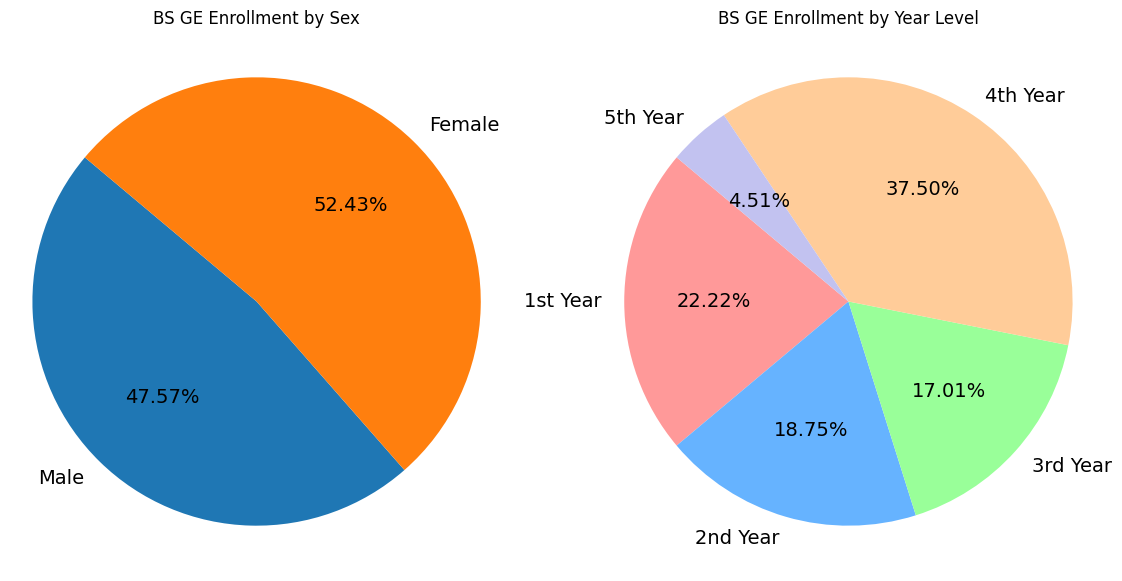

In [ ]:
import matplotlib.pyplot as plt

# Data for overall enrollment by sex
labels_sex = ['Male', 'Female']
sizes_sex = [47.57, 52.43]
colors_sex = ['#1f77b4', '#ff7f0e']  # Different colors for each segment

# Data for enrollment by year
labels_year = ['1st Year', '2nd Year', '3rd Year', '4th Year', '5th Year']
sizes_year = [64, 54, 49, 108, 13]
colors_year = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#c2c2f0']  # Different colors for each year

# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

# Pie chart for overall enrollment by sex
ax[0].pie(sizes_sex, labels=labels_sex, colors=colors_sex, autopct='%1.2f%%', startangle=140, textprops={'fontsize': 14})
ax[0].set_title('BS GE Enrollment by Sex')
ax[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Pie chart for enrollment by year
ax[1].pie(sizes_year, labels=labels_year, colors=colors_year, autopct='%1.2f%%', startangle=140, textprops={'fontsize': 14})
ax[1].set_title('BS GE Enrollment by Year Level')
ax[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the charts
plt.show()
